source: https://www.kaggle.com/hoonkeng/deep-analysis-on-youtube-trending-videos-eda/notebook


In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
filepath1 = 'dataframe.csv' #if file is not in same dir as notebook, must change path
filepath2 = 'dataframe_all_timestamps.csv' #if file is not in same dir as notebook, must change path

df = pd.read_csv(filepath1)
df_all_timestamps = pd.read_csv(filepath2)

In [4]:
def stringify(row):
    return str(row['publish_date']) + ' ' + str(row['publish_time'])

df_all_timestamps.loc[:,'string_date_time'] = \
                            df_all_timestamps.apply(stringify, axis=1)

df_all_timestamps.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df_all_timestamps['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')

df_all_timestamps = df_all_timestamps.drop('string_date_time', axis=1)


#make a new column in df called 'publish_timestamp' 
#that is a datetime object

df.loc[:,'string_date_time'] = df.apply(stringify, axis=1)
df.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')
df = df.drop('string_date_time', axis=1)

In [5]:
#optional
# makes new columns by taking the logarithm of the views, likes, 
#dislikes and comment_count to compress the scale for easier graphing 

import numpy as np
df.loc[:,'log_views'] = np.log(df.loc[:,'views']+1)
df.loc[:,'log_likes'] = np.log(df.loc[:,'likes']+1)
df.loc[:,'log_dislikes'] = np.log(df.loc[:,'dislikes']+1)
df.loc[:,'log_comment_count'] = np.log(df.loc[:,'comment_count']+1)

#show all columns
pd.set_option('display.max_columns', 100)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171149 entries, 0 to 171148
Data columns (total 24 columns):
video_id                  171149 non-null object
trending_date             171149 non-null object
title                     171149 non-null object
channel_title             171149 non-null object
category_id               171149 non-null int64
category                  171149 non-null object
publish_date              171149 non-null object
publish_time              171149 non-null object
tags                      171149 non-null object
views                     171149 non-null int64
likes                     171149 non-null int64
dislikes                  171149 non-null int64
comment_count             171149 non-null int64
thumbnail_link            171149 non-null object
comments_disabled         171149 non-null bool
ratings_disabled          171149 non-null bool
video_error_or_removed    171149 non-null bool
description               171149 non-null object
country           

In [6]:
df_all_timestamps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356350 entries, 0 to 356349
Data columns (total 20 columns):
video_id                  356350 non-null object
trending_date             356350 non-null object
title                     356350 non-null object
channel_title             356350 non-null object
category_id               356350 non-null int64
category                  356350 non-null object
publish_date              356350 non-null object
publish_time              356350 non-null object
tags                      356350 non-null object
views                     356350 non-null int64
likes                     356350 non-null int64
dislikes                  356350 non-null int64
comment_count             356350 non-null int64
thumbnail_link            356350 non-null object
comments_disabled         356350 non-null bool
ratings_disabled          356350 non-null bool
video_error_or_removed    356350 non-null bool
description               356350 non-null object
country           

/Users/miguelgris/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:969: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  **self.kwds


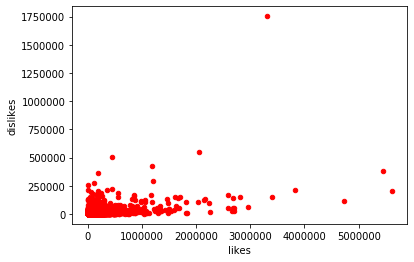

In [13]:
df.plot(x='likes',y='dislikes',kind='scatter',color='R')

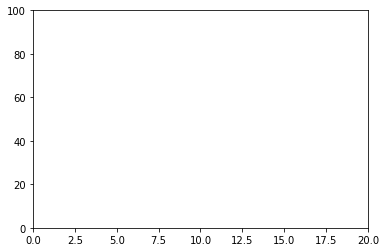

In [15]:
df1=df[:20]
df1['views'].plot(kind='line',xlim=(0,20),ylim=(0,100))

In [16]:
drop.df(views)

NameError: name 'drop' is not defined

/Users/miguelgris/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

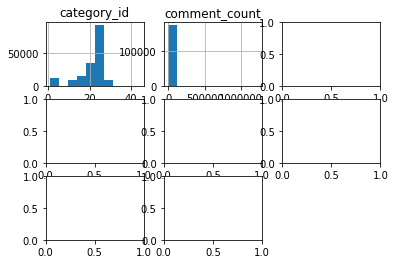

In [17]:
df.hist()

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

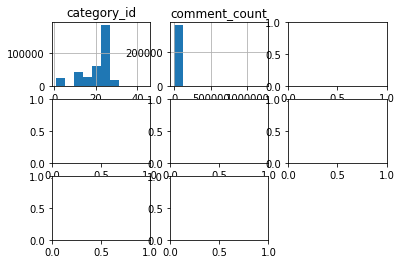

In [18]:
df_all_timestamps.hist()

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

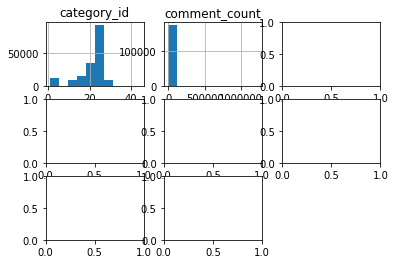

In [19]:
df.hist()

In [20]:
df[comment_count].plot()

NameError: name 'comment_count' is not defined

In [21]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,171149.000000,1.711490e+05,1.711490e+05,1.711490e+05,1.711490e+05
mean,20.922576,3.628359e+05,1.010452e+04,6.533677e+02,1.304655e+03
std,6.753576,2.888626e+06,5.417935e+04,6.348801e+03,7.834437e+03
min,1.000000,1.530000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,2.263500e+04,3.460000e+02,2.100000e+01,5.500000e+01
50%,24.000000,7.664000e+04,1.498000e+03,7.900000e+01,2.350000e+02
75%,24.000000,2.424700e+05,5.830000e+03,2.900000e+02,8.320000e+02
max,44.000000,4.245389e+08,5.613827e+06,1.753274e+06,1.228655e+06


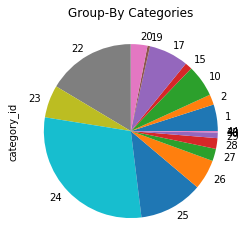

In [22]:
df.groupby('category_id')['category_id'].agg('count').plot(kind='pie',title='Group-By Categories')


In [23]:
df_all_timestamps.describe()


,category_id,views,likes,dislikes,comment_count
count,356350.000000,3.563500e+05,3.563500e+05,3.563500e+05,3.563500e+05
mean,20.209847,1.383542e+06,3.964151e+04,2.130516e+03,4.366423e+03
std,7.166210,7.278916e+06,1.693050e+05,1.977425e+04,2.408002e+04
min,1.000000,1.170000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,5.076500e+04,7.700000e+02,4.500000e+01,1.230000e+02
50%,23.000000,1.907045e+05,3.875000e+03,1.940000e+02,5.550000e+02
75%,24.000000,6.874125e+05,1.893700e+04,7.980000e+02,2.148000e+03
max,44.000000,4.245389e+08,5.613827e+06,1.753274e+06,1.228655e+06


In [24]:
df.category_id.describe()

count    171149.000000
mean         20.922576
std           6.753576
min           1.000000
25%          20.000000
50%          24.000000
75%          24.000000
max          44.000000
Name: category_id, dtype: float64

In [25]:
df.views.describe()

count    1.711490e+05
mean     3.628359e+05
std      2.888626e+06
min      1.530000e+02
25%      2.263500e+04
50%      7.664000e+04
75%      2.424700e+05
max      4.245389e+08
Name: views, dtype: float64

In [26]:
df.views_hist()

AttributeError: 'DataFrame' object has no attribute 'views_hist'

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

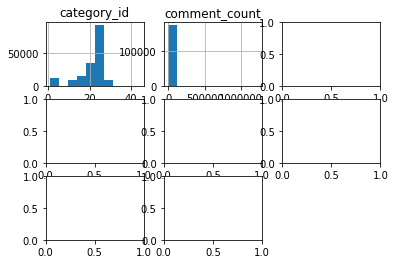

In [27]:
df.hist()

In [28]:
df.comment_count_hist()

AttributeError: 'DataFrame' object has no attribute 'comment_count_hist'

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

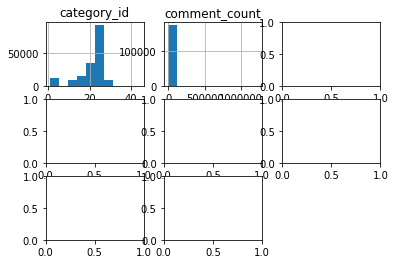

In [29]:
df.hist()

In [30]:
df.category_id(hist)

NameError: name 'hist' is not defined

In [31]:
df[:10].plot(kind = 'hist',subplots=True, layout = (4,3))

ValueError: view limit minimum -10372.600000000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1a1d0817b8> (for post_execute):


ValueError: view limit minimum -10372.600000000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -10372.600000000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [32]:
df

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR,2017-11-12 17:58:57
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR,2017-11-12 13:46:18
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR,2017-11-12 19:08:08
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR,2017-11-13 19:58:33
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,http://top-channel.tv/programe/portokalli/,FR,2017-11-13 13:33:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171144,qLM1NA272v0,2018-06-14,حصري/ شاهد ماذا فعل مشجعون مغاربة بتركي آل شيخ...,Elbotola,17,Sports,2018-06-13,20:59:22,"Elbotola.com|""elbotolatv""|""elbotolaMedia""|""الب...",179322,1890,346,2229,https://i.ytimg.com/vi/qLM1NA272v0/default.jpg,False,False,False,اضغط و اشترك في قناتنا : http://bit.ly/2oEM69K...,DE,2018-06-13 20:59:22
171145,xpP9TR0M5e8,2018-06-14,"Nach 37 Sekunden passiert etwas im Ofen, das j...",Leckerschmecker,26,Howto & Style,2018-06-13,16:30:03,"Leckerschmecker|""Rezepte""|""kochen""|""backen""|""k...",29630,1029,36,55,https://i.ytimg.com/vi/xpP9TR0M5e8/default.jpg,False,False,False,Auf Pinterest merken: http://bit.ly/2xZZooyDie...,DE,2018-06-13 16:30:03
171146,WxJ4SfmUGgY,2018-06-14,НЕРЯХА ДЖО! БУРГЕР для детей и взрослых (здоро...,oblomoff,24,Entertainment,2018-06-13,11:04:35,"рецепт|""дачный рецепт""|""рецепт на углях""|""реце...",587480,35688,1207,2380,https://i.ytimg.com/vi/WxJ4SfmUGgY/default.jpg,False,False,False,Купи свой Биван со скидкой 20% по промокоду СЛ...,DE,2018-06-13 11:04:35
171147,znUg17W526o,2018-06-14,Die Wahrheit über die WM 2018,MrWissen2go,22,People & Blogs,2018-06-13,12:30:02,"wissen2go|""mrwissen2go""|""fußballweltmeistersch...",164294,9065,453,1632,https://i.ytimg.com/vi/znUg17W526o/default.jpg,False,False,False,Keine Frage - die Fußball-Weltermeisterschaft ...,DE,2018-06-13 12:30:02


In [33]:
df_all_timestamps

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA,2017-11-10 17:00:03
1,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR,2017-11-12 17:58:57
2,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR,2017-11-12 13:46:18
3,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR,2017-11-12 19:08:08
4,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR,2017-11-13 19:58:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356345,qLM1NA272v0,2018-06-14,حصري/ شاهد ماذا فعل مشجعون مغاربة بتركي آل شيخ...,Elbotola,17,Sports,2018-06-13,20:59:22,"Elbotola.com|""elbotolatv""|""elbotolaMedia""|""الب...",179322,1890,346,2229,https://i.ytimg.com/vi/qLM1NA272v0/default.jpg,False,False,False,اضغط و اشترك في قناتنا : http://bit.ly/2oEM69K...,DE,2018-06-13 20:59:22
356346,xpP9TR0M5e8,2018-06-14,"Nach 37 Sekunden passiert etwas im Ofen, das j...",Leckerschmecker,26,Howto & Style,2018-06-13,16:30:03,"Leckerschmecker|""Rezepte""|""kochen""|""backen""|""k...",29630,1029,36,55,https://i.ytimg.com/vi/xpP9TR0M5e8/default.jpg,False,False,False,Auf Pinterest merken: http://bit.ly/2xZZooyDie...,DE,2018-06-13 16:30:03
356347,WxJ4SfmUGgY,2018-06-14,НЕРЯХА ДЖО! БУРГЕР для детей и взрослых (здоро...,oblomoff,24,Entertainment,2018-06-13,11:04:35,"рецепт|""дачный рецепт""|""рецепт на углях""|""реце...",587480,35688,1207,2380,https://i.ytimg.com/vi/WxJ4SfmUGgY/default.jpg,False,False,False,Купи свой Биван со скидкой 20% по промокоду СЛ...,DE,2018-06-13 11:04:35
356348,znUg17W526o,2018-06-14,Die Wahrheit über die WM 2018,MrWissen2go,22,People & Blogs,2018-06-13,12:30:02,"wissen2go|""mrwissen2go""|""fußballweltmeistersch...",164294,9065,453,1632,https://i.ytimg.com/vi/znUg17W526o/default.jpg,False,False,False,Keine Frage - die Fußball-Weltermeisterschaft ...,DE,2018-06-13 12:30:02


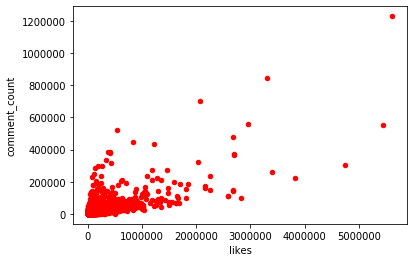

In [34]:
df.plot(x='likes',y='comment_count',kind='scatter',color='R')

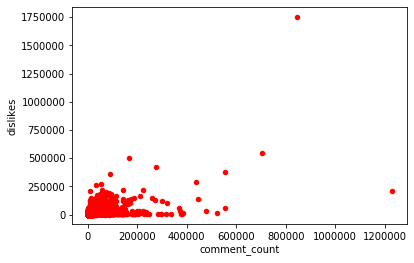

In [35]:
df.plot(x='comment_count',y='dislikes',kind='scatter',color='R')

In [1]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df